## Step 1: Data Collection


Load the dataset that related to flight price, routes

In [52]:
import pandas as pd

# Load the dataset
price_dataset = pd.read_csv('/Users/Hohei/Documents/GitHub/Assignment-2---Computing-Technology-Innovation-Project/Data/Price_Data/Cleaned_Done_price_dataset.csv')

# Display the first few rows to inspect the data
price_dataset.head()

,Year,Month,YearMonth,Port1,Port2,Route,$Value,$Real
0,2010,1,201001,Adelaide,Brisbane,Adelaide - Brisbane,208.0,305.66
1,2010,1,201001,Adelaide,Canberra,Adelaide - Canberra,258.0,379.14
2,2010,1,201001,Adelaide,Darwin,Adelaide - Darwin,358.0,526.09
3,2010,1,201001,Adelaide,Gold Coast,Adelaide - Gold Coast,128.0,188.10
4,2010,1,201001,Adelaide,Melbourne,Adelaide - Melbourne,86.0,126.38


## Step 2: Data Processing

The Data Processing step involves cleaning and transforming the data to make it ready for model building.

### 2.1 Encode Categorical Features

Categorical variables (such as Port1, Port2, and Route) need to be encoded into numerical format using one-hot encoding.

In [53]:
# Define the features (X) and target variable (y)
X = price_dataset[['Year', 'Month', 'Port1', 'Port2', 'Route']]
y = price_dataset['$Real']  # Target variable (flight price)

# Perform one-hot encoding on categorical features
X_encoded = pd.get_dummies(X, columns=['Port1', 'Port2', 'Route'])

# Display the first few rows of the encoded dataset
X_encoded.head()

,Year,Month,Port1_Adelaide,Port1_Albury,Port1_Alice Springs,Port1_Armidale,Port1_Avalon,Port1_Ayers Rock,Port1_Ballina,Port1_Brisbane,...,Route_Perth - Newman,Route_Perth - Port Hedland,Route_Perth - Sydney,Route_Port Macquarie - Sydney,Route_Proserpine - Sydney,Route_Sunshine Coast - Melbourne,Route_Sunshine Coast - Sydney,Route_Sydney - Tamworth,Route_Sydney - Townsville,Route_Sydney - Wagga Wagga
0,2010,1,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2010,1,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2010,1,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2010,1,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2010,1,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Step 3: Data Analysis

### 3.1 Visualise Flight Price Distribution

visualize the distribution of flight prices to understand its shape

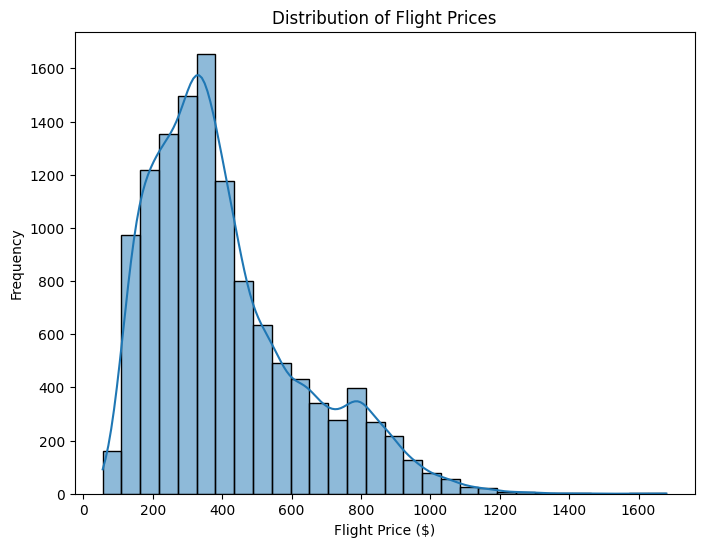

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the target variable (flight price)
plt.figure(figsize=(8, 6))
sns.histplot(y, bins=30, kde=True)
plt.title('Distribution of Flight Prices')
plt.xlabel('Flight Price ($)')
plt.ylabel('Frequency')
plt.show()

## 3.2 Correlation Heatmap

visualize the correlations between the features and the target variable

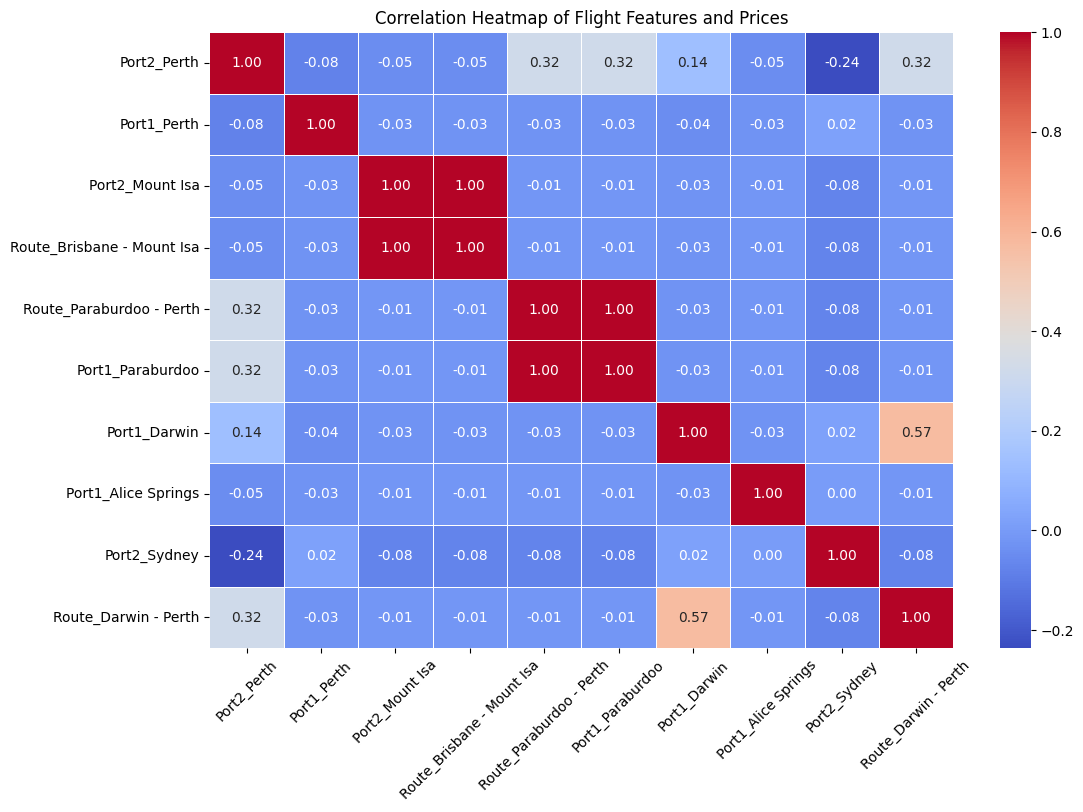

In [55]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr_matrix = X_encoded.join(y).corr()

# Get correlations with the target variable $Real
target_corr = corr_matrix['$Real'].abs().sort_values(ascending=False)

# Select top 10 most correlated features (excluding the target variable itself)
top_features = target_corr.index[1:11]

# Filter the correlation matrix to show only top correlated features
top_corr_matrix = corr_matrix.loc[top_features, top_features]

# Plot the heatmap with the top features
plt.figure(figsize=(12, 8))
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Flight Features and Prices')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


## Step 4. Model Selection

select and implement machine learning models to predict flight prices

### 4.1 Train-Test Split

split the data into training and testing sets

In [56]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


### 4.2 Linear Regression


use Linear Regression as a baseline model

In [57]:
from sklearn.linear_model import LinearRegression

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)


### 4.3 Random Forest Regressor

Next, train a Random Forest Regressor, which is a non-linear model.

In [58]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)


### 4.4 K-Means Clustering


Apply K-Means Clustering to group similar routes based on features like origin, destination, and flight price

In [59]:
from sklearn.cluster import KMeans

# Fit the K-Means model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_encoded)

# Add the cluster labels to the dataset
X_clustered = X_encoded.copy()
X_clustered['KMeans_Cluster'] = clusters

# Analyze the clusters
print(X_clustered.groupby('KMeans_Cluster').mean())

                       Year     Month  Port1_Adelaide  Port1_Albury  \
KMeans_Cluster                                                        
0               2013.842048  3.364651        0.118192      0.014161   
1               2021.172138  6.282519        0.129462      0.014772   
2               2013.846616  9.633734        0.119541      0.014192   

                Port1_Alice Springs  Port1_Armidale  Port1_Avalon  \
KMeans_Cluster                                                      
0                          0.024782        0.007625      0.021514   
1                          0.001641        0.013541      0.020927   
2                          0.022107        0.009279      0.020742   

                Port1_Ayers Rock  Port1_Ballina  Port1_Brisbane  ...  \
KMeans_Cluster                                                   ...   
0                       0.017157       0.014161        0.232571  ...   
1                       0.012721       0.014567        0.233894  ...   
2         

### 4.5 DBSCAN Clustering


Apply DBSCAN for clustering and outlier detection

In [60]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_encoded)

# Add the DBSCAN cluster labels to the dataset
X_clustered['DBSCAN_Cluster'] = dbscan_labels

# Analyze the DBSCAN clusters
print(X_clustered.groupby('DBSCAN_Cluster').mean())

                       Year     Month  Port1_Adelaide  Port1_Albury  \
DBSCAN_Cluster                                                        
-1              2016.769451  6.410647        0.123096      0.014414   

                Port1_Alice Springs  Port1_Armidale  Port1_Avalon  \
DBSCAN_Cluster                                                      
-1                         0.014742        0.010483      0.021048   

                Port1_Ayers Rock  Port1_Ballina  Port1_Brisbane  ...  \
DBSCAN_Cluster                                                   ...   
-1                      0.014988       0.014333        0.233415  ...   

                Route_Perth - Port Hedland  Route_Perth - Sydney  \
DBSCAN_Cluster                                                     
-1                                0.014414              0.014414   

                Route_Port Macquarie - Sydney  Route_Proserpine - Sydney  \
DBSCAN_Cluster                                                             
-1  

## Step 5. Model Evaluation

### To evaluate the models, we will use Mean Squared Error (MSE) and R² score to compare performance.

### 5.1 Evaluate Linear Regression

Evaluate the performance of the Linear Regression model using Mean Squared Error (MSE) and R² score.

In [61]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the Linear Regression model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression - MSE: {mse_linear}, R²: {r2_linear}")


Linear Regression - MSE: 10254.165335013286, R²: 0.769620822199406


### 5.2 Evaluate Random Forest Regressor

Evaluate the Random Forest Regressor model using the same metrics.



In [62]:
# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor - MSE: {mse_rf}, R²: {r2_rf}")


Random Forest Regressor - MSE: 6073.794577069237, R²: 0.86354074124229


### 5.3 Evaluate Clustering Models

Evaluate the clusters generated by K-Means and DBSCAN by examining the average values of features in each cluster.

In [63]:
# K-Means Clusters
print(X_clustered.groupby('KMeans_Cluster').mean())

# DBSCAN Clusters
print(X_clustered.groupby('DBSCAN_Cluster').mean())


                       Year     Month  Port1_Adelaide  Port1_Albury  \
KMeans_Cluster                                                        
0               2013.842048  3.364651        0.118192      0.014161   
1               2021.172138  6.282519        0.129462      0.014772   
2               2013.846616  9.633734        0.119541      0.014192   

                Port1_Alice Springs  Port1_Armidale  Port1_Avalon  \
KMeans_Cluster                                                      
0                          0.024782        0.007625      0.021514   
1                          0.001641        0.013541      0.020927   
2                          0.022107        0.009279      0.020742   

                Port1_Ayers Rock  Port1_Ballina  Port1_Brisbane  ...  \
KMeans_Cluster                                                   ...   
0                       0.017157       0.014161        0.232571  ...   
1                       0.012721       0.014567        0.233894  ...   
2         